In [ ]:
# Import libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining image size and training and validation data path
IMAGE_SIZE = [224, 224]

train_data_path = '/content/drive/MyDrive/final_dataset/train'
validation_data_path = '/content/drive/MyDrive/final_dataset/valid'

In [ ]:
# Performing data augmentation on training data
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path,
                                      target_size=(224, 224), 
                                      batch_size=16,
                                      class_mode='categorical') 

Found 43273 images belonging to 25 classes.


In [ ]:
# Performing data augmentation on validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(224,224),
                                  batch_size=16,
                                  class_mode='categorical')

Found 6145 images belonging to 25 classes.


In [ ]:
training_data.class_indices

{'apple': 0,
 'banana': 1,
 'buildings': 2,
 'cat': 3,
 'cow': 4,
 'daisy': 5,
 'dandelion': 6,
 'dog': 7,
 'elephant': 8,
 'forest': 9,
 'glacier': 10,
 'guava': 11,
 'horse': 12,
 'kiwi': 13,
 'mango': 14,
 'mountain': 15,
 'muskmelon': 16,
 'orange': 17,
 'pitaya': 18,
 'rose': 19,
 'sea': 20,
 'squirrel': 21,
 'street': 22,
 'sunflower': 23,
 'tulip': 24}

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/model_mobilenetv2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Loading pretrained model
mobilenetv2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# freezing base model weights
for layer in mobilenetv2.layers:
    layer.trainable = False

In [ ]:
# getting number of output classes
folders = glob('/content/drive/MyDrive/final_dataset/train/*')

In [ ]:
# our layers
x = Flatten()(mobilenetv2.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=mobilenetv2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# train model
history = model.fit(training_data,
                           epochs=25,
                           verbose=1,
                           validation_data= valid_data,
                           callbacks=callbacks_list)

Epoch 1/25
2705/2705 [==============================] - 11536s 4s/step - loss: 6.5006 - accuracy: 0.7762 - val_loss: 3.7054 - val_accuracy: 0.9201

Epoch 00001: val_accuracy improved from -inf to 0.92010, saving model to /content/drive/MyDrive/model_mobilenetv2.h5
Epoch 2/25
2705/2705 [==============================] - 610s 226ms/step - loss: 6.9191 - accuracy: 0.8740 - val_loss: 4.6125 - val_accuracy: 0.9214

Epoch 00002: val_accuracy improved from 0.92010 to 0.92140, saving model to /content/drive/MyDrive/model_mobilenetv2.h5
Epoch 3/25
2705/2705 [==============================] - 609s 225ms/step - loss: 7.0118 - accuracy: 0.8879 - val_loss: 5.0188 - val_accuracy: 0.9234

Epoch 00003: val_accuracy improved from 0.92140 to 0.92335, saving model to /content/drive/MyDrive/model_mobilenetv2.h5
Epoch 4/25
2705/2705 [==============================] - 613s 227ms/step - loss: 7.1739 - accuracy: 0.8975 - val_loss: 5.7235 - val_accuracy: 0.9261

Epoch 00004: val_accuracy improved from 0.92335 

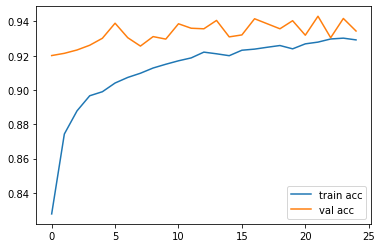

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')